# Projet Data Science Kaggle

### Objectif du projet: 
Classifier les passagers d'un vaisseau spatial pour savoir ceux qui ont survécu à l'accident.

### 1. Importation des librairies 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, classification_report


C:\Users\tiemoko.sogodogo\AppData\Local\Temp\ipykernel_19548\1256587993.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### 2. Chargement des données 

In [2]:
spaceship_titanic_dataset = pd.read_csv('train.csv')
print(f"La taille (Lignes et colonnes) de l'ensemble des données d'entraînement : {spaceship_titanic_dataset.shape}")

La taille (Lignes et colonnes) de l'ensemble des données d'entraînement : (8693, 14)


### 4. Visualisation des données

In [4]:
spaceship_titanic_dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Visualisation nombre de passagers transportés (True) et non transportés (False) 

Text(0, 0.5, 'Nombre')

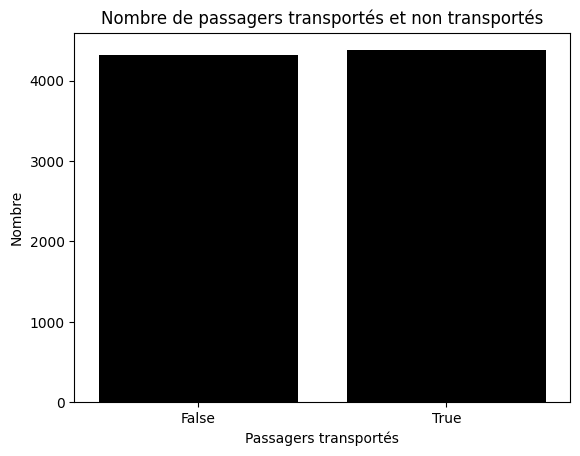

In [7]:
###Dans nos données d'entraînement
ax = sns.countplot(spaceship_titanic_dataset, x='Transported', color='black')
ax.set_title('Nombre de passagers transportés et non transportés')
ax.set_xlabel('Passagers transportés')
ax.set_ylabel('Nombre')

### Conclusion :
Nous avons presque les memes nombres de passagers transportés et non transportés

Text(0.5, 1.0, "Distribution de l'âge")

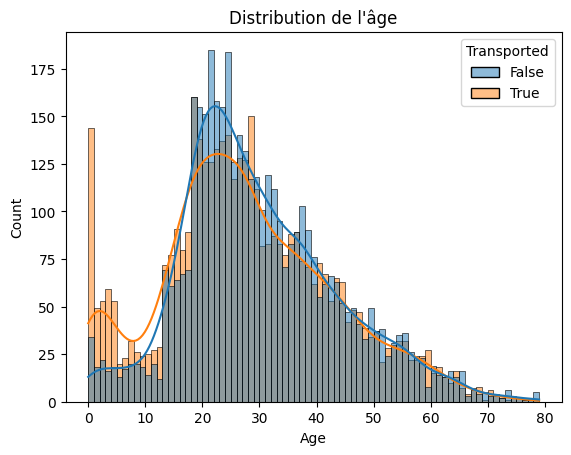

In [8]:
sns.histplot(data=spaceship_titanic_dataset, x='Age', hue='Transported', binwidth=1, kde=True)
plt.title('Distribution de l\'âge')

### Conclusion :
On verra que les passagers de :
- 0-18 ans étaient plus susceptibles d'être transportés que de ne pas l'être.
- 18-25 ans étaient moins susceptibles d'être transportés que de ne pas l'être.
- Les plus de 25 ans ont à peu près autant de chances d'être transportés que de ne pas l'être.

In [9]:
spaceship_titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [3]:
###Suppression des colonnes non importantes pour nos données d'entraînement
spaceship_titanic_train = spaceship_titanic_dataset.drop(['Name'], axis=1)
spaceship_titanic_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


### 5. Gestion des valeurs manquantes 

In [11]:
#moyenne des valeurs manquantes dans chaque variable
spaceship_titanic_dataset.isnull().mean().sort_values(ascending=False)

CryoSleep       0.024963
ShoppingMall    0.023927
VIP             0.023352
HomePlanet      0.023122
Name            0.023007
Cabin           0.022892
VRDeck          0.021627
FoodCourt       0.021051
Spa             0.021051
Destination     0.020936
RoomService     0.020821
Age             0.020591
PassengerId     0.000000
Transported     0.000000
dtype: float64

Nous remarquons qu'il y a beaucoup de valeurs manquantes. Pour remédier à cela, nous allons essayer deux méthodes.

### Première methode pour gérer les valeurs manquantes
Processus : Nous allons sélectionner aléatoirement des valeurs pour chaque variable du dataset afin de remplacer les valeurs manquantes, ainsi nous ne perdrons pas nos données.

In [4]:
def missing_values_random(dataset):
    df = dataset.copy()
    null_values = df.isnull().sum().sort_values(ascending=False)
    for col in null_values.index:
        if null_values[col] != 0:
            new_col = col + '_filled'
            df[new_col] = df[col].copy()

            random_sample = df[col].dropna().sample(df[col].isnull().sum(), random_state=0)
            random_sample.index = df[df[col].isnull()].index

            df.loc[df[col].isnull(), new_col] = random_sample
    return df


In [5]:
resultat_random = missing_values_random(spaceship_titanic_dataset)
resultat_random.isnull().sum().sort_values(ascending=False)


CryoSleep              217
ShoppingMall           208
VIP                    203
HomePlanet             201
Name                   200
Cabin                  199
VRDeck                 188
FoodCourt              183
Spa                    183
Destination            182
RoomService            181
Age                    179
Destination_filled       0
FoodCourt_filled         0
Spa_filled               0
PassengerId              0
RoomService_filled       0
Cabin_filled             0
VRDeck_filled            0
Transported              0
Name_filled              0
HomePlanet_filled        0
VIP_filled               0
ShoppingMall_filled      0
CryoSleep_filled         0
Age_filled               0
dtype: int64

In [ ]:
def compare_distributions(dataset):
    # Sélectionner les colonnes numériques et catégorielles
    numeric_columns = dataset.select_dtypes(include=['number']).columns
    categorical_columns = dataset.select_dtypes(include=['object']).columns
    
    # Comparaison des distributions pour les colonnes numériques
    for var in numeric_columns:
        var_filled = var + '_filled'
        if var_filled in dataset.columns:
            plt.figure(figsize=(6, 4))  # Taille plus petite
            dataset[var].plot(kind='kde', label=f"{var} original", color='blue')
            dataset[var_filled].plot(kind='kde', label=f"{var} filled", color='red')
            plt.title(f"Distribution de {var}")
            plt.legend()
            plt.xlabel(var)
            plt.ylabel('Density')
            plt.xlim(dataset[var].min(), dataset[var].max())
            plt.ylim(0, None)
            plt.show()
    
    # Comparaison des distributions pour les colonnes catégorielles
    for var in categorical_columns:
        var_filled = var + '_filled'
        if var_filled in dataset.columns:
            plt.figure(figsize=(4, 3))  # Taille plus petite
            dataset[var].value_counts(normalize=True).plot(kind='bar', alpha=0.5, label=f"{var} original", color='blue')
            dataset[var_filled].value_counts(normalize=True).plot(kind='bar', alpha=0.5, label=f"{var} filled", color='red')
            plt.title(f"Distribution de {var}")
            plt.legend()
            plt.xlabel(var)
            plt.ylabel('Fréquence')
            plt.show()


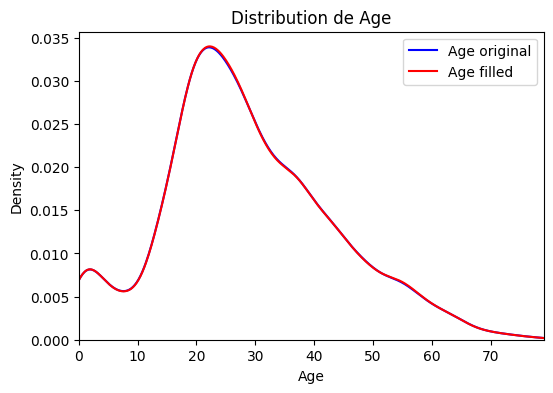

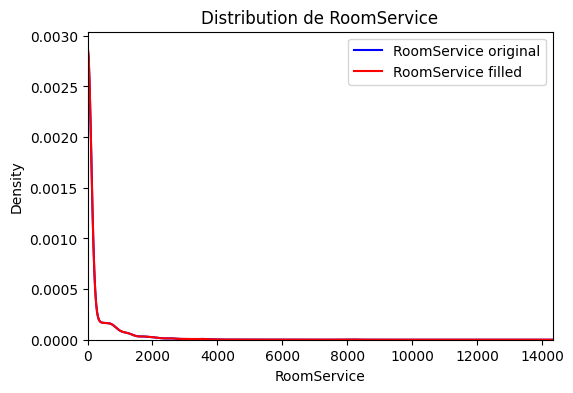

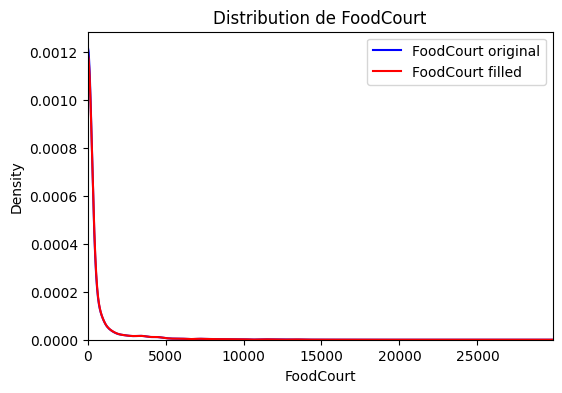

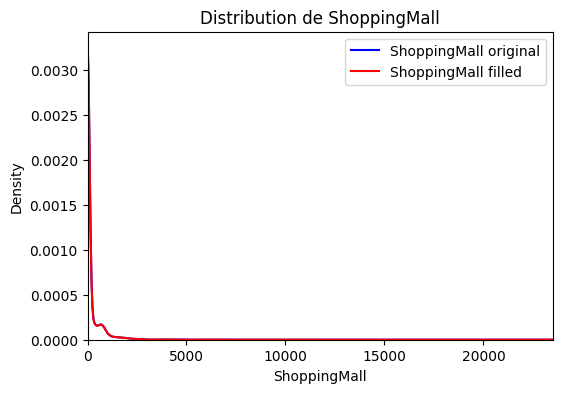

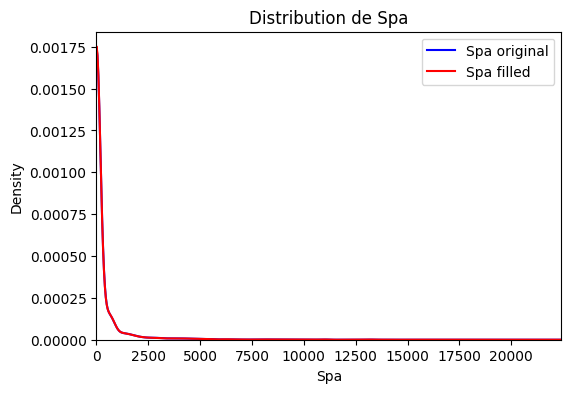

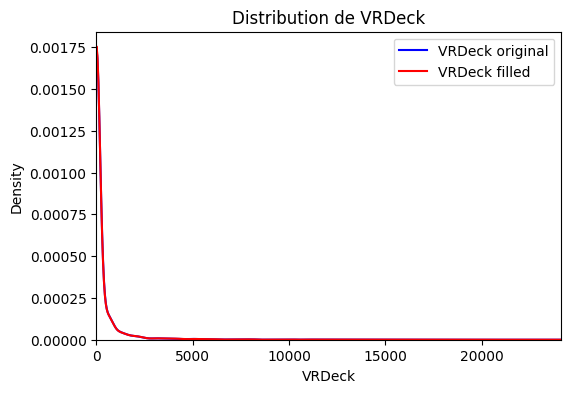

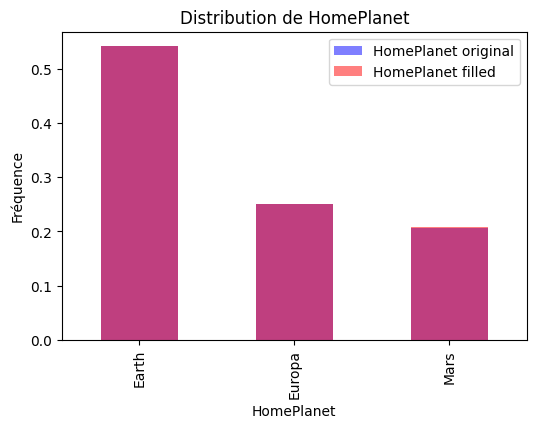

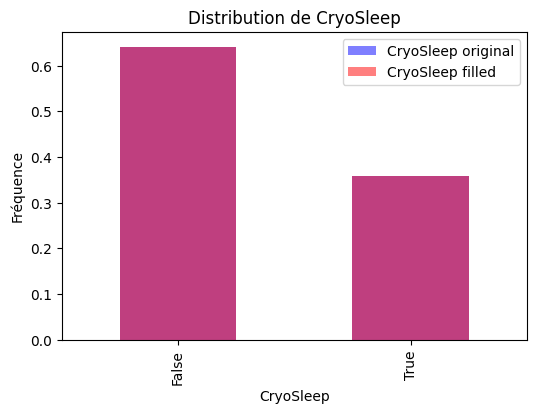

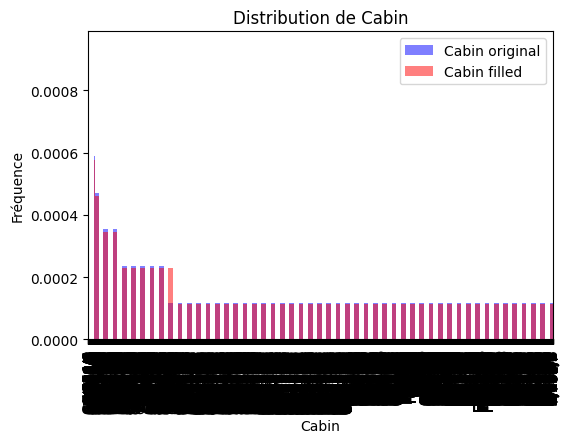

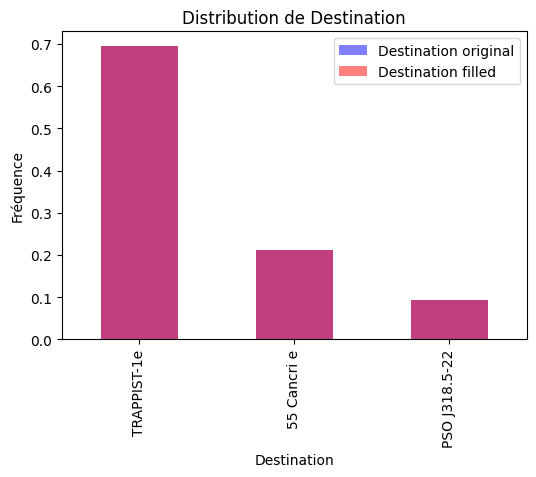

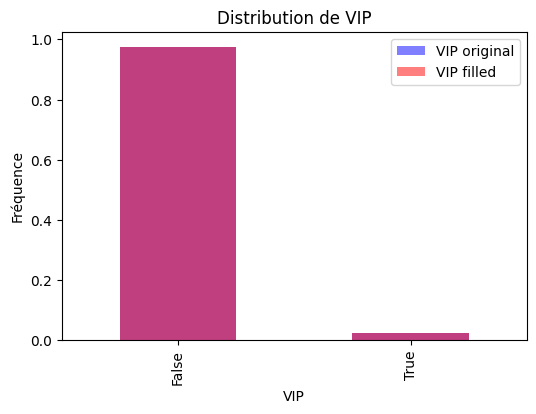

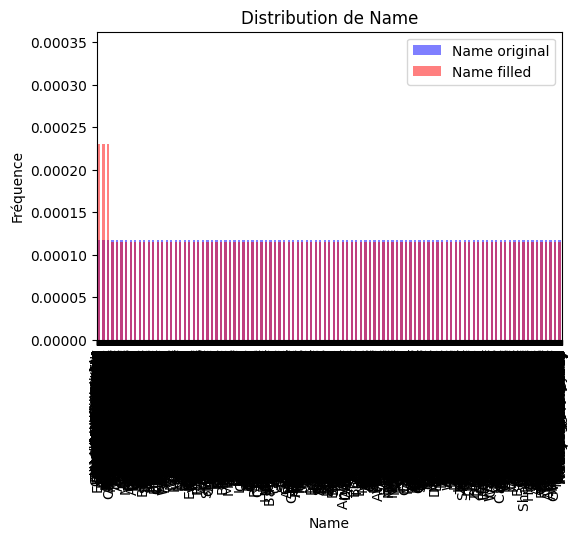

In [16]:
compare_distributions(resultat_random)

### Deuxième methode pour gérer les valeurs manquantes 
Processus : Remplacer les valeurs manquantes par le mode pour les variables et visualiser la distribution de la variable ensuite.

In [17]:
def missing_values_mode(dataset):
    new_dataset = dataset.copy()
      
    for var in new_dataset.columns:
        if new_dataset[var].isnull().sum() > 0:
            mode_value = new_dataset[var].mode()[0]  
            new_var_name = var + '_filled'  
            new_dataset[new_var_name] = new_dataset[var].fillna(mode_value)  
            
    return new_dataset
    

In [18]:
resultat_values_mode = missing_values_mode(spaceship_titanic_train)
resultat_values_mode.isnull().sum().sort_values(ascending= True)

PassengerId              0
ShoppingMall_filled      0
FoodCourt_filled         0
RoomService_filled       0
VIP_filled               0
Age_filled               0
Destination_filled       0
Cabin_filled             0
CryoSleep_filled         0
HomePlanet_filled        0
Transported              0
VRDeck_filled            0
Spa_filled               0
Age                    179
RoomService            181
Destination            182
Spa                    183
FoodCourt              183
VRDeck                 188
Cabin                  199
HomePlanet             201
VIP                    203
ShoppingMall           208
CryoSleep              217
dtype: int64

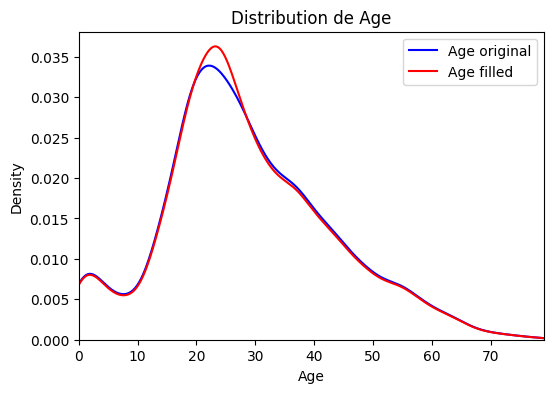

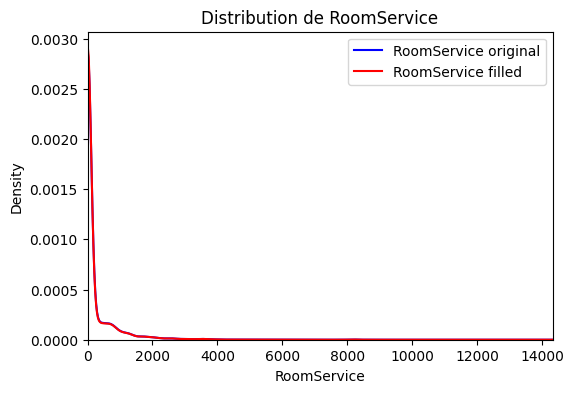

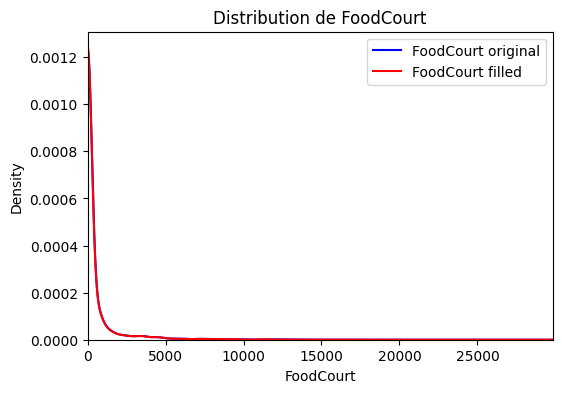

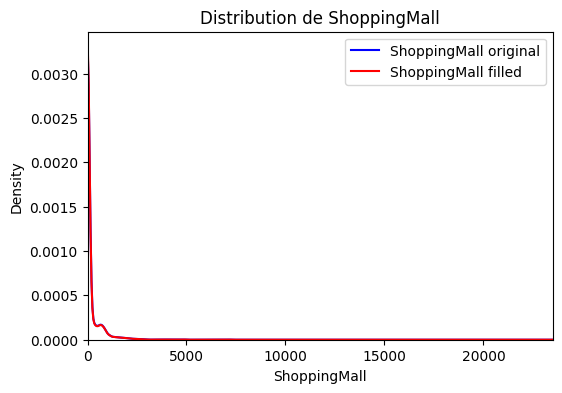

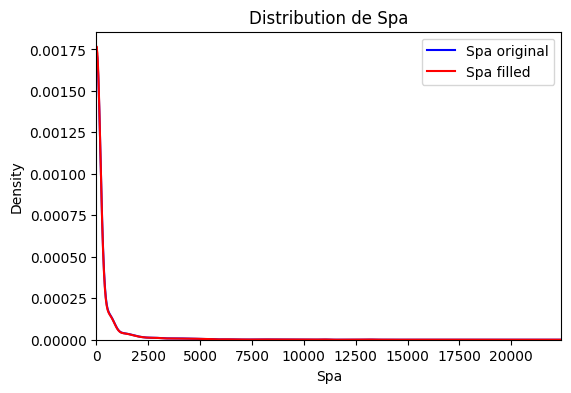

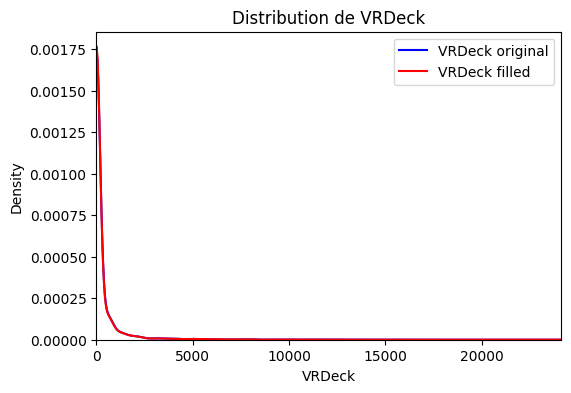

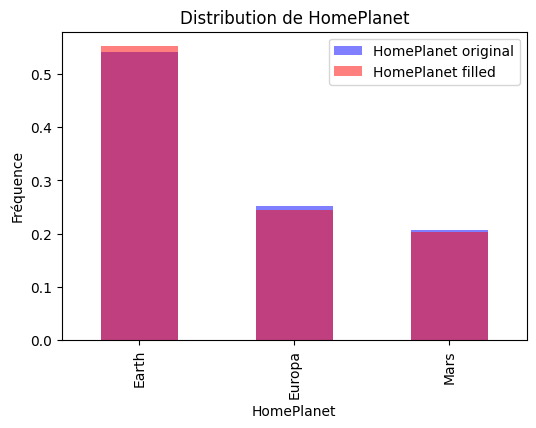

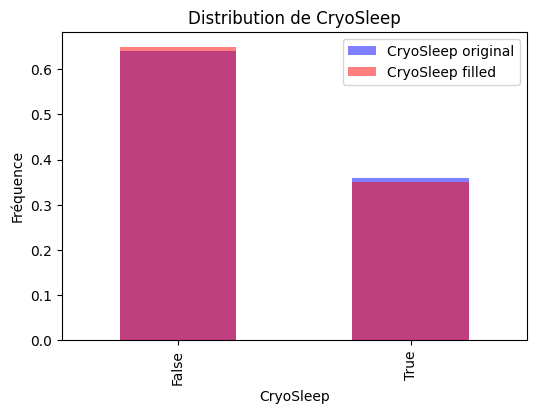

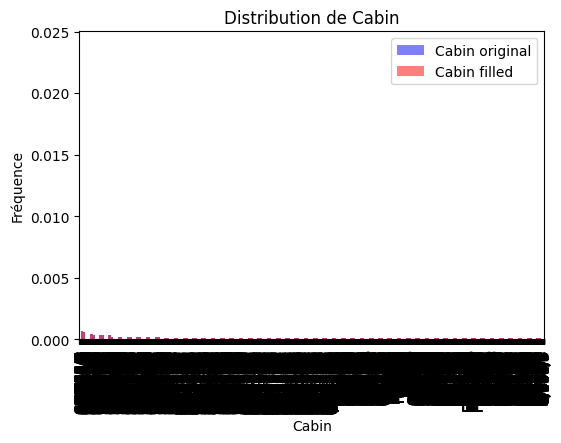

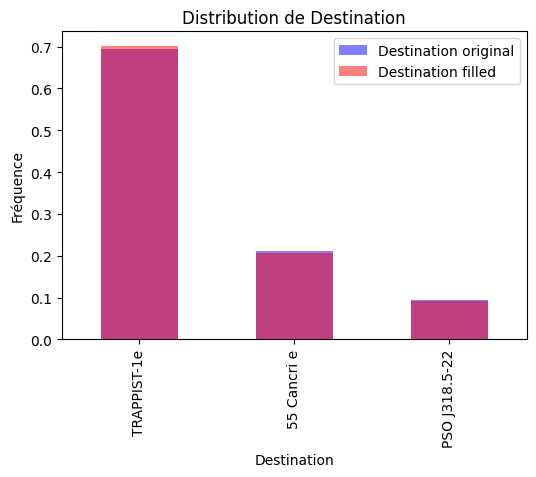

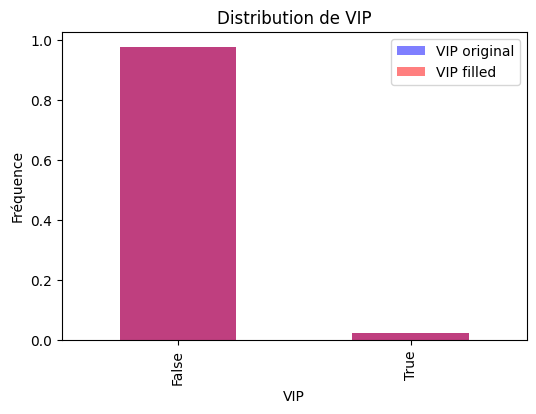

In [19]:
compare_distributions(resultat_values_mode)

### Conclusion de cette étape:
 Vu que la distribution des variables avec le remplacement des valeurs manquantes par le mode ne semble pas changer on peut alors on peut conclure que c'est une bonne methode et qu'on peut utiliser les variables de ce dataset pour effectuer nos analyses

In [6]:
###Suppression des colonnes non importantes pour nos données d'entraînement sur le dataset calculer avec le valeurs aleatoires
resultat_random = resultat_random.drop(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name_filled', 'Name'], axis=1)
resultat_random.head()

,PassengerId,Transported,CryoSleep_filled,ShoppingMall_filled,VIP_filled,HomePlanet_filled,Cabin_filled,VRDeck_filled,FoodCourt_filled,Spa_filled,Destination_filled,RoomService_filled,Age_filled
0,0001_01,False,False,0.0,False,Europa,B/0/P,0.0,0.0,0.0,TRAPPIST-1e,0.0,39.0
1,0002_01,True,False,25.0,False,Earth,F/0/S,44.0,9.0,549.0,TRAPPIST-1e,109.0,24.0
2,0003_01,False,False,0.0,True,Europa,A/0/S,49.0,3576.0,6715.0,TRAPPIST-1e,43.0,58.0
3,0003_02,False,False,371.0,False,Europa,A/0/S,193.0,1283.0,3329.0,TRAPPIST-1e,0.0,33.0
4,0004_01,True,False,151.0,False,Earth,F/1/S,2.0,70.0,565.0,TRAPPIST-1e,303.0,16.0


### 5. Visualisation des valeurs aberrantes 

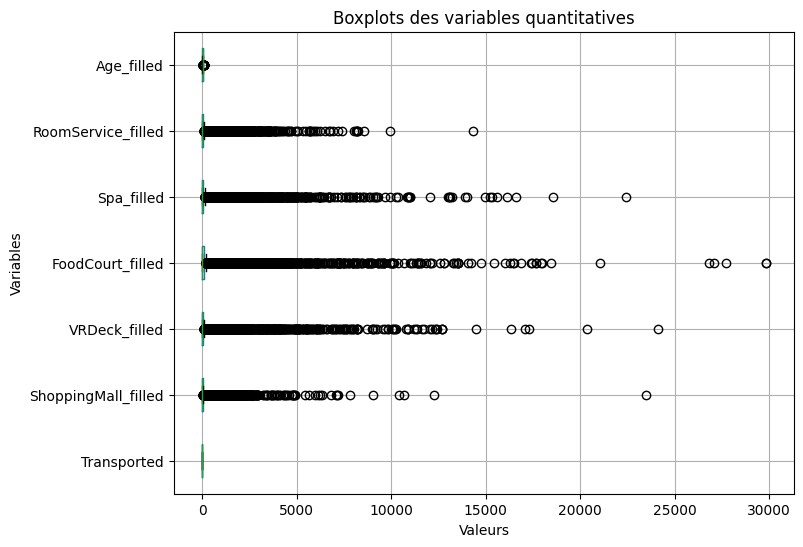

In [23]:
plt.figure(figsize=(8, 6))
resultat_random.boxplot(vert=False)
plt.title("Boxplots des variables quantitatives")
plt.xlabel("Valeurs")
plt.ylabel("Variables")
plt.show()

### Conclusion : 
Vu que les valeurs aberrantes sont assez minimes dans nos données on peut décider de ne pas les gérer 

### NB: il faut ajouter la partie des doublons

### 6.  Entrainement et teste sur le dataset selectionné avec plusieurs modèles de classification

In [7]:
# Convertir les colonnes catégorielles en numériques
def preprocess_data(df):
    label_encoders = {}
    for column in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le
    return df, label_encoders



In [11]:
def test_model_on_dataset(model, target_column='Transported'):
    global resultat_random
    resultat_random, _ = preprocess_data(resultat_random)

    X = resultat_random.drop(columns=[target_column])
    y = resultat_random[target_column]

    # Prétraitement des données avec la mise à l'échelle
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Ajustement du modèle sur l'ensemble d'entraînement
    model.fit(X_train, y_train)

    # Prédire les résultats sur l'ensemble de test
    y_pred = model.predict(X_test)

    # Calculer et afficher les métriques de performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {model.__class__.__name__}: {accuracy:.4f}")
    
    # Matrice de confusion
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)


In [9]:
#Definition des models afin de les utiliser 
models = [
    RandomForestClassifier(random_state=42),
    LogisticRegression(random_state=42),
    SVC(random_state=42),
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=42)
]

In [12]:
#boucle pour tester et donner le resultat de tous les models definis dans la variable models
for model in models:
    test_model_on_dataset(model)

Accuracy for RandomForestClassifier: 0.7786
Confusion Matrix:
 [[681 180]
 [205 673]]
Accuracy for LogisticRegression: 0.7631
Confusion Matrix:
 [[634 227]
 [185 693]]
Accuracy for SVC: 0.7844
Confusion Matrix:
 [[663 198]
 [177 701]]
Accuracy for KNeighborsClassifier: 0.7602
Confusion Matrix:
 [[649 212]
 [205 673]]
Accuracy for DecisionTreeClassifier: 0.7136
Confusion Matrix:
 [[619 242]
 [256 622]]
